In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
import numpy as np
import seaborn as sns


In [3]:
data = pd.read_csv('../datasets/OIE_data.csv')
ic(data.columns)
data.info()

ic| data.columns: Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
                         'Symptombeginn', 'Pittingquote_absolut_modified',
                         'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
                         'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
                         'R_percent', '[R]', 'RPI', 'time', 'patient_id'],
                        dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientnumber                  305 non-null    object 
 1   malclass                       305 non-null    object 
 2   PTH                            305 non-null    int64  
 3   age                            305 non-null    int64  
 4   sex                            305 non-null    object 
 5   Ethnicity                      305 non-null    object 
 6   Groups                         295 non-null    object 
 7   Symptombeginn                  285 non-null    float64
 8   Pittingquote_absolut_modified  145 non-null    float64
 9   Pittingquote_modified          145 non-null    float64
 10  Immunity                       195 non-null    object 
 11  [iE]                           61 non-null     float64
 12  parasitemia                    61 non-null     flo

In [4]:
data["Groups"][data["Groups"].isna()]='severe'
groups = data["Groups"].unique() 
groups = groups[:] # in nan are severe Malaria patients so excluded 

/tmp/ipykernel_5708/439371852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Groups"][data["Groups"].isna()]='severe'


ic| group: 'African, non-immune'
ic| len(data["patientnumber"][data["Groups"]==group].unique()): 22
ic| pth: 0
ic| len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()): 12
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia']): 0.75
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['[iE]']): 40500.0
ic| pth: 1
ic| len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()): 10
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia']): 1.5
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['[iE]']): 77250.0
ic| group: 'Non-African'
ic| len(data["patientnumber"][data["Groups"]==group].unique()): 20
ic| pth: 0
ic| len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()): 13
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia']): 0.35
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pt

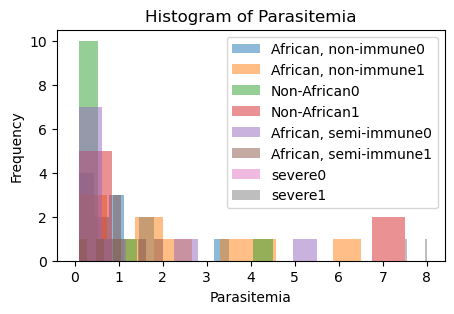

In [5]:
fig, ax = plt.subplots(figsize = (5, 3))
for group in groups:
    ic(group)
    ic(len(data["patientnumber"][data["Groups"]==group].unique()))
    for pth in (0,1):
        ic(pth)
        ax.hist(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia'], bins=10, alpha=0.5, label=group+str(pth))
        ic(len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()))
        ic(np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['parasitemia']))
        ic(np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['[iE]']))


ax.set_xlabel('Parasitemia')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Parasitemia')
ax.legend()
plt.show()  

ic| group: 'African, non-immune'
ic| pth: 0
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 4.0
ic| pth: 1
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 4.0
ic| group: 'Non-African'
ic| pth: 0
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 2.0
ic| pth: 1
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 5.0
ic| group: 'African, semi-immune'
ic| pth: 0
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 4.0
ic| pth: 1
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 5.0
ic| group: 'severe'
ic| pth: 0
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): nan
ic| pth: 1
ic| np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']): 7.0


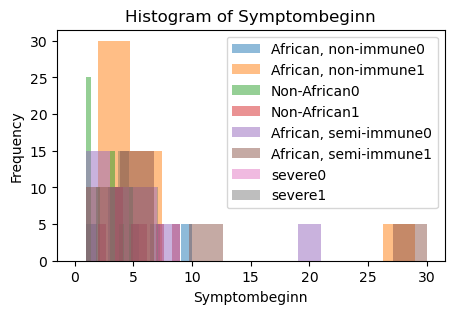

In [6]:
fig, ax = plt.subplots(figsize = (5, 3))
for group in groups:
    ic(group)
    #ic(len(data["patientnumber"][data["Groups"]==group].unique()))
    for pth in (0,1):
        ic(pth)
        ax.hist(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn'], bins=10, alpha=0.5, label=group+str(pth))
        #ic(len(data["patientnumber"][(data["Groups"]==group) & (data["PTH"]==pth)].unique()))
        ic(np.nanmedian(data[(data["Groups"]==group) & (data["PTH"]==pth)]['Symptombeginn']))

ax.set_xlabel('Symptombeginn')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Symptombeginn')
ax.legend()
plt.show()  

In [7]:
def extract_patient(data: pd.DataFrame, patient_id: int) -> pd.DataFrame:    
    patient_df = data[data['patient_id'] == patient_id] 
    return patient_df

def list_patients(data: pd.DataFrame) -> list:
    patients = data['patient_id'].unique()
    return patients

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)

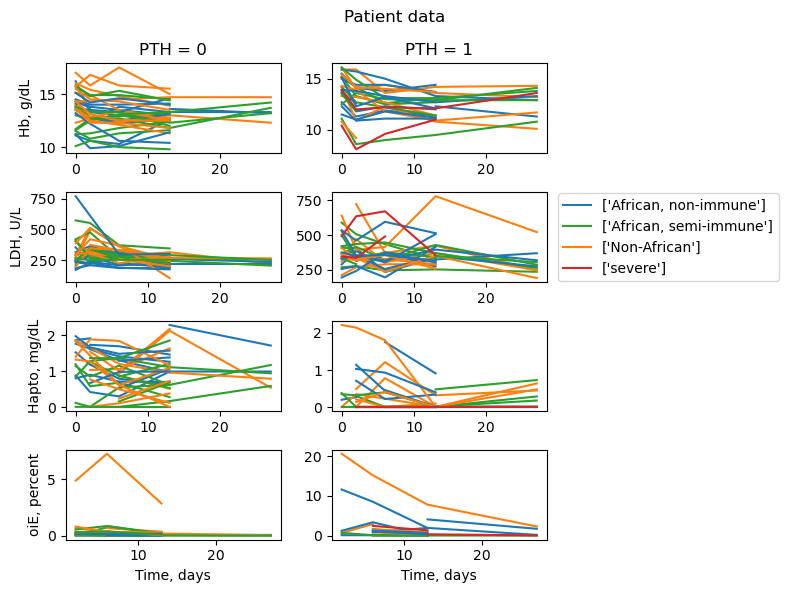

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(8, 6))

for patient in list_patients(data):
    patient_df = extract_patient(data, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]

    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb'], label=patient_df["Groups"].unique(), color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH'], label = patient_df["Groups"].unique(), color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto'], label = patient_df["Groups"].unique(), color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

In [9]:
def normalize_hb(data: pd.DataFrame):
    data['Hb_norm'] = (data['Hb'] - data['Hb'].mean()) / data['Hb'].std()
    return data

def normalize_ldh(data: pd.DataFrame):
    data['LDH_norm'] = (data['LDH'] - data['LDH'].mean()) / data['LDH'].std()
    return data 

def normalize_hapto(data: pd.DataFrame):
    data['Hapto_norm'] = (data['Hapto'] - data['Hapto'].mean()) / data['Hapto'].std()
    return data 


def normalize_oie(data: pd.DataFrame):
    data['oiE_percent_norm'] = (data['oiE_percent'] - data['oiE_percent'].mean()) / data['oiE_percent'].std()
    return data 

def normalyize_data(data: pd.DataFrame):
    data = normalize_hb(data)
    data = normalize_ldh(data)
    data = normalize_hapto(data)
    data = normalize_oie(data)  
    return data 

In [10]:
n_data = normalyize_data(data)

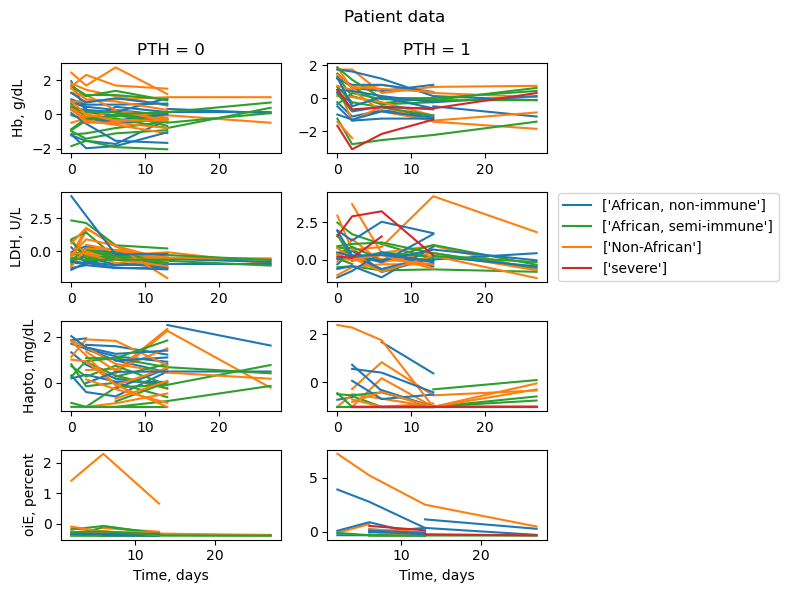

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]

    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm'], label=patient_df["Groups"].unique(), color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm'], label = patient_df["Groups"].unique(), color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm'], label = patient_df["Groups"].unique(), color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

In [12]:
# Define a function to calculate normalized values
def calculate_normalized_feat(patient_data, feature: str):
    mean_feat = patient_data[feature].mean()
    std_feat = patient_data[feature].std()
    normalized_feat = (patient_data[feature] - mean_feat)/std_feat
    return normalized_feat

def normalize_data_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_norm_ind'] = calculate_normalized_feat(patient_df, feature)
    return data

In [13]:
n_data_ind = normalize_data_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])

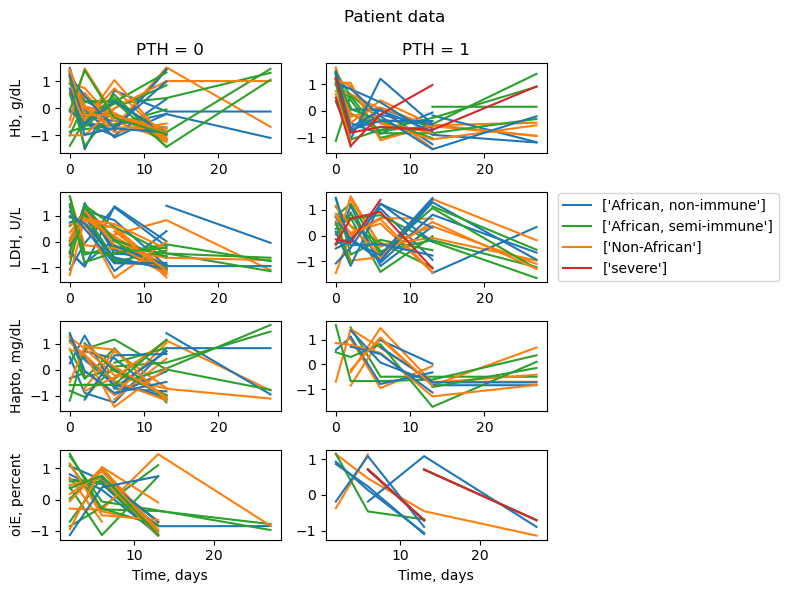

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(8, 6))

for patient in list_patients(n_data_ind):
    patient_df = extract_patient(n_data_ind, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]

    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm_ind'], label=patient_df["Groups"].unique(), color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm_ind'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

In [15]:
# Define a function to calculate normalized Hb values
def calculate_minmax_feat(patient_data, feature: str):
    max_feat = patient_data[feature].max()
    min_feat = patient_data[feature].min()
    normalized_feat = (patient_data[feature] - min_feat)/(max_feat-min_feat)
    return normalized_feat

def normalize_data_minmax_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_minmax_ind'] = calculate_minmax_feat(patient_df, feature        )
    return data

In [16]:
n_data = normalize_data_minmax_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])   

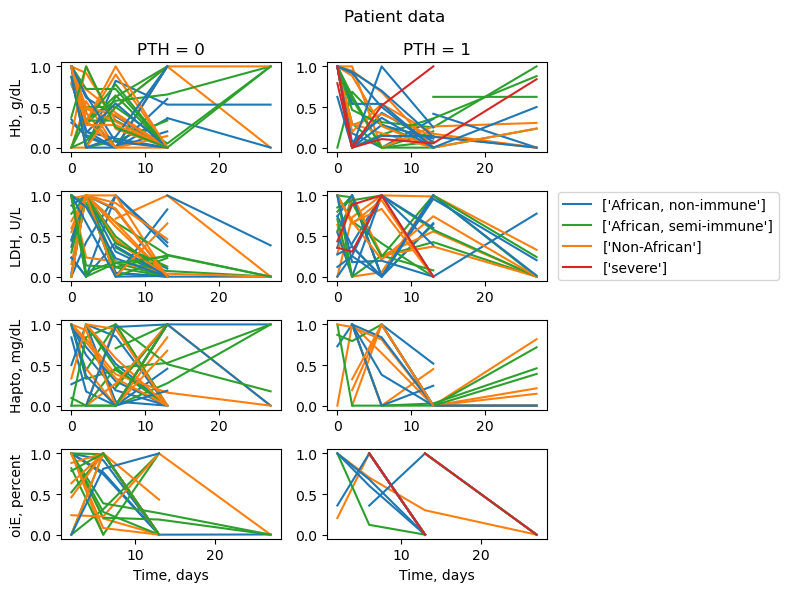

In [17]:
fig, ax = plt.subplots(4, 2, figsize=(8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]

    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_minmax_ind'], label=patient_df["Groups"].unique(), color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_minmax_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_minmax_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_minmax_ind'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

In [18]:
def get_stats_of_feature(data: pd.DataFrame, feature: str, group: list, pth: int=0):
    pth_data = data[(data["Groups"].isin(group))&(data['PTH'] == pth)]

    feature_array = pth_data[feature].values
    f_reshaped = feature_array.reshape(len(feature_array)//5 , 5)

    mean_feature = np.nanmean(f_reshaped, axis=0)
    median_feature = np.nanmedian(f_reshaped, axis=0)  
    std_feature = np.nanstd(f_reshaped, axis=0)
    sem_feature = std_feature/np.sqrt(len(f_reshaped))

    percentile_25, percentile_75 = np.nanpercentile(f_reshaped, [25, 75], axis=0)


    return mean_feature, median_feature,percentile_25, percentile_75, std_feature, sem_feature

In [19]:
feature_list = ['Hb', 'LDH', 'Hapto', '[oiE]', 'RPI', '[E]', '[iE]', '[R]', 'Hkt']    

In [20]:
feature_stats = {g+"_"+str(i):{} for g in groups[:-1] for i in (0,1)}
for i,feature in enumerate(feature_list):
    for group in groups[:-1]:
        for pth in (0,1):
            feature_stats[group+"_"+str(pth)][feature] = get_stats_of_feature(n_data, feature, [group], pth)

/tmp/ipykernel_5708/1047815679.py:7: RuntimeWarning: Mean of empty slice
  mean_feature = np.nanmean(f_reshaped, axis=0)
/tmp/ipykernel_5708/1047815679.py:8: RuntimeWarning: All-NaN slice encountered
  median_feature = np.nanmedian(f_reshaped, axis=0)
/home/nexia/miniconda3/envs/phd/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/nexia/miniconda3/envs/phd/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


In [21]:
groups =['Non-African','African, non-immune','African, semi-immune', 'severe']
stats_order = ['Mean', 'Median', 'Percentile_25', 'percentile_75', 'Std.','SEM']


In [55]:
# Set rcParams for the desired font sizes
plt.rcParams['axes.titlesize'] = 14      # Title font size
plt.rcParams['axes.labelsize'] = 12      # Axis label font size
plt.rcParams['xtick.labelsize'] = 12     # X tick label font size
plt.rcParams['ytick.labelsize'] = 12     # Y tick label font size
plt.rcParams['legend.fontsize'] = 12     # Legend font size
plt.rcParams['legend.title_fontsize'] = 12 # Legend title font size
species_to_analyze = {
    'parasitemia' : ['parasitemia (%)', 1],
    'Hapto' : ['Haptoglobin (U/l)',1,(0, 2.2)],
    '[iE]': ['iE (1e4/µl)', 1e4,( 0, 2.5e1)],
    '[oiE]': ['oiE (1e4/µl)', 1e4,(0, 4e1)],
    '[E]': ['E (1e4/µl)', 1e4,( 3e2, 6.5e2)],
    '[R]': ['R (1e4/µl)', 1e4,( 0, 2.5e1)],
    '[P]': ['P (1e2/µl)', 1e2],
    'Hb': ['Hb (g/dl)', 1, (10.5, 16.0)],
    'Hkt': ['Hct', 1, ( 0.25, .5)],
    'RPI': ['RPI', 1, (0, 3.0)],
    'LDH': ['LDH (1e2 U/l)',1e2,(1.5, 7.5)],
}

# fig = plt.figure(figsize=(15,15),layout="constrained")
# n_col = 3
# subfigs = fig.subfigures(len(feature_list), n_col)
# colors = ['red','green','green']
# k=-1
# imunities = ['#EDAE49','#e83f6f','#2274a5']

# for outerind, subfig in enumerate(subfigs.flat):
#     group = groups[outerind%n_col]

#     if 'severe' in group:
#         continue
#     axs = subfig.subplots(1, 2, sharex='all', sharey='all', subplot_kw=dict(rasterized=True))
#     patients_df = n_data[n_data['Groups']==group]

#     if outerind%n_col == 0:
#         feature = feature_list[int(outerind/n_col)]
#         axs[0].set_ylabel(species_to_analyze[feature][0])
#     else:
#         axs[0].set_yticklabels('')

#     if outerind <24:
#         axs[0].set_xticklabels('')
#         axs[1].set_xticklabels('')
#     else:
#         axs[0].set_xlabel('Time in [days]')
#         axs[1].set_xlabel('Time in [days]')
        
#     if outerind< 3:
#         subfig.suptitle(f'{group}')

#     calibrate_d = species_to_analyze[feature][1]
   
#     # Plot patients in the correct group
#     for patient in list_patients(patients_df):
#         patient_df = extract_patient(n_data, patient)
#         pth = int(patient_df['PTH'].values[0])
#         c_int = np.where(groups==patient_df["Groups"].unique())[0][0]
    
#         color = imunities[c_int]
#         axs[pth].plot(patient_df['time'], patient_df[feature]/calibrate_d, label=patient_df["Groups"].unique(), color=color, alpha=0.5)
    
#     # Stats plot for each group
#     for innerind, ax in enumerate(axs.flat):
        
#         #ax.set_prop_cycle(plt.cycler('color', colors))
#         if outerind< 3:
#             n_patients = len(ax.get_legend_handles_labels()[0])
#             ax.set_title(f'PTH={innerind}, n_P={n_patients}')

#         ax.plot(patient_df['time'], 
#                 np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,1]/calibrate_d,
#                 label='Median', color='red' )
        
#         ax.fill_between(patient_df['time'],
#                         (np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,0]-np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,-2])/calibrate_d,
#                         (np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,0]+np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,-2])/calibrate_d, 
#                         color='grey',label = 'Std',alpha=0.5)
#         ax.fill_between(patient_df['time'],
#                         np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,2]/calibrate_d,
#                         np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,3]/calibrate_d, 
#                         color='green',label = 'Percentils 25&75',alpha=0.5)
#         ax.errorbar(patients_df['time'].unique(), 
#                     np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,0]/calibrate_d,
#                     label = "Mean+"+stats_order[k], color='black', alpha=1,
#                     yerr=np.array(feature_stats[group+"_"+str(innerind)][feature]).T[:,k]/calibrate_d, 
#                     markersize=4, capsize=3, fmt="--o", ecolor = "black")
#         if feature=='[iE]':
#              ax.plot(n_data['time'].unique(),[0]*len(n_data['time'].unique()))
        
#         ax.grid()
#         ax.set_ylim(species_to_analyze[feature][2])

# handles, labels = ax.get_legend_handles_labels()
# subfigs[-1,-1].legend(handles[-4:], labels[-4:],loc='center', bbox_to_anchor=(1.08, 0., 0.2, .9))

# #plt.tight_layout()
# plt.savefig('figures/patient_data_viz/immunity_patients.pdf', dpi=300,bbox_inches='tight')
# plt.show()

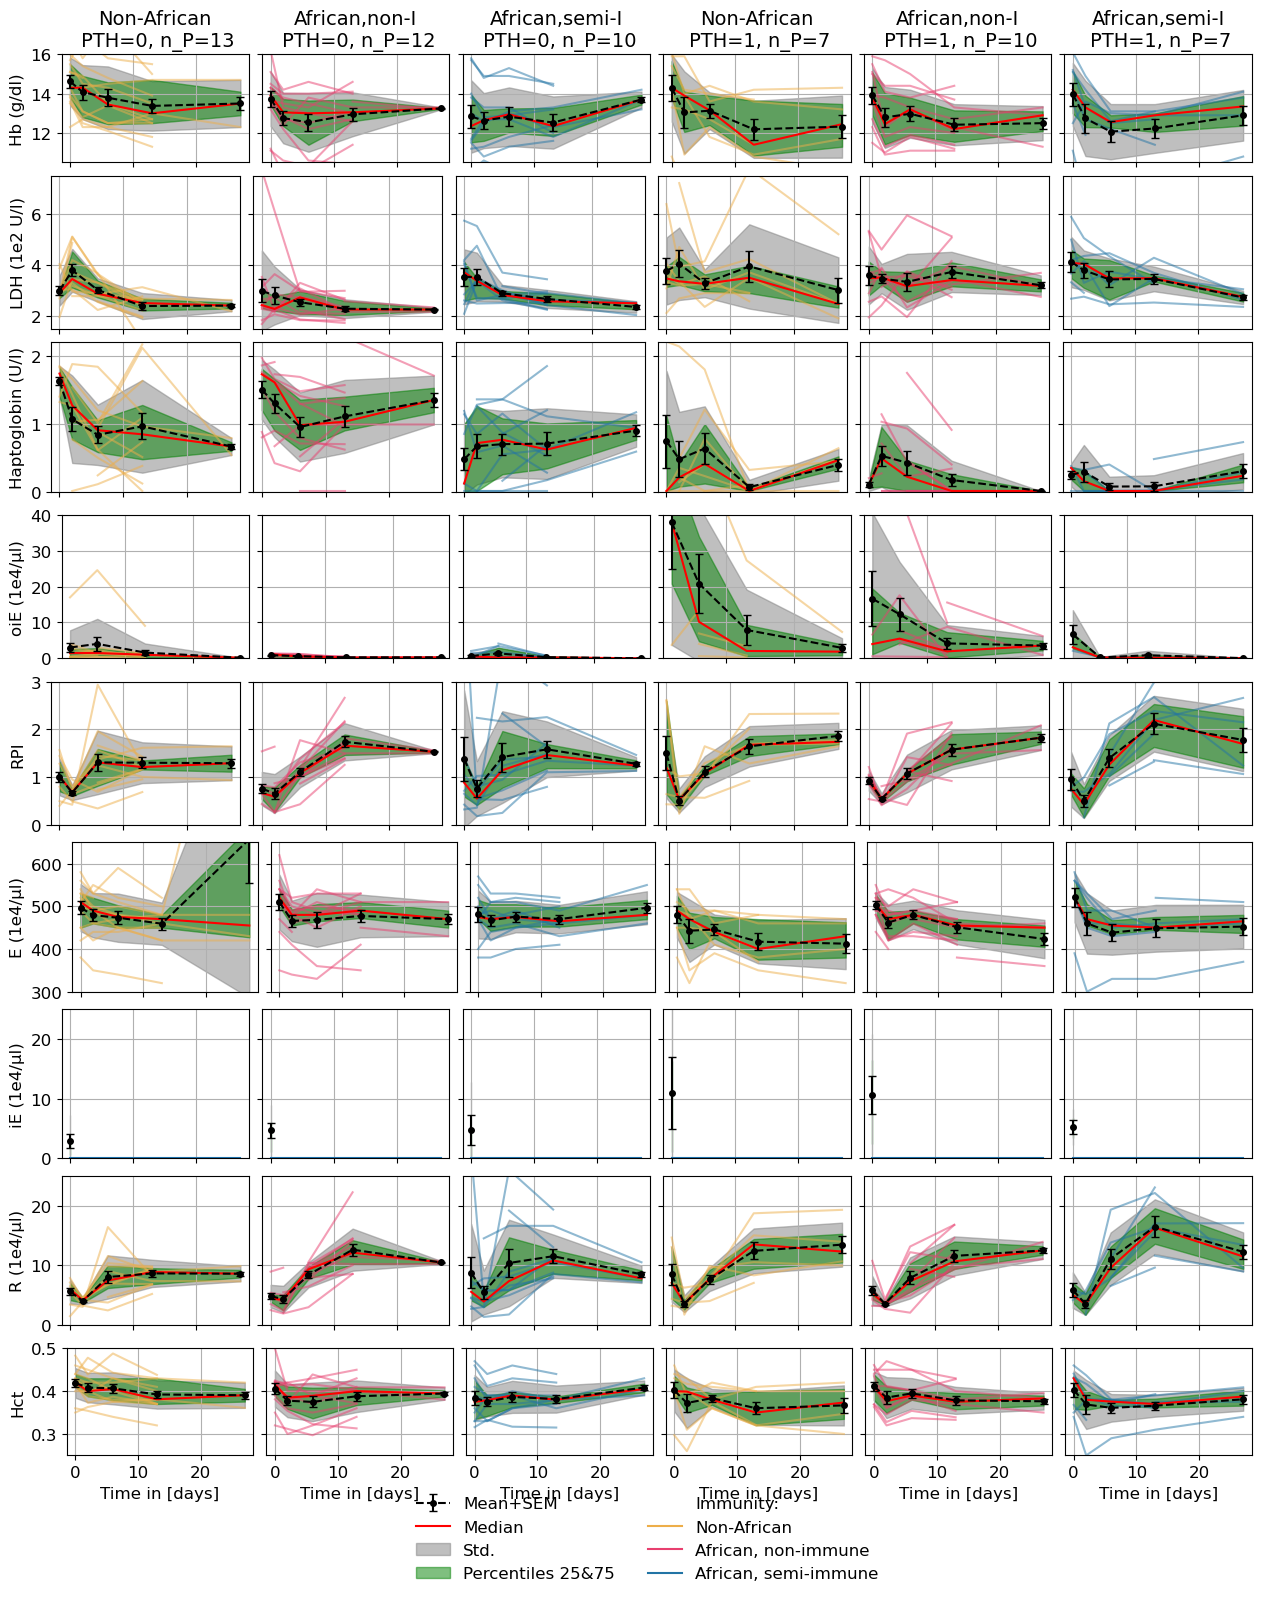

In [56]:
fig = plt.figure(figsize=(12.5, 15), layout='constrained')
outer_grid = fig.add_gridspec(len(feature_list), 1)

colors = ['red', 'green', 'green']
imunities = ['#EDAE49', '#e83f6f', '#2274a5']
k = -1
n_col = 6
pth_ar = [0,0,0,1,1,1]

for outerind, feature in enumerate(feature_list):
    inner_grid = outer_grid[outerind].subgridspec(1, n_col)
    for innergrid in range(n_col):
        pth = pth_ar[innergrid]
        ax = fig.add_subplot(inner_grid[innergrid])
        innerind= innergrid % 3
        group = groups[innerind]

        if 'severe' in group:
            continue
        patients_df = n_data[(n_data['Groups'] == group) & (n_data["PTH"] == pth)]

        calibrate_d = species_to_analyze[feature][1]
        
        if innergrid == 0:
            ax.set_ylabel(species_to_analyze[feature][0])
        
        # Plot patients in the correct group
        for patient in list_patients(patients_df):
            patient_df = extract_patient(n_data, patient)
            c_int = np.where(groups == patient_df["Groups"].unique())[0][0]

            color = imunities[c_int]
            ax.plot(patient_df['time'], patient_df[feature] / calibrate_d, label=patient_df["Groups"].unique(),
                    color=color, alpha=0.5, rasterized=True)

        if outerind==0:
            n_patients = len(ax.get_legend_handles_labels()[0])
            ax.set_title(f'{group.replace(" ","").replace("immune","I")}\n PTH={pth}, n_P={n_patients}')
        # Plot Median
        ax.plot(patient_df['time'], 
                np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, 1] / calibrate_d,
                label='Median', color='red', rasterized=True)
        # Plot Area of mean +- Std
        ax.fill_between(patient_df['time'],
                        (np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, 0] - np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, -2]) / calibrate_d,
                        (np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, 0] + np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, -2]) / calibrate_d, 
                        color='grey', label='Std.', alpha=0.5, rasterized=True)
        
        ax.fill_between(patient_df['time'],
                        np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, 2] / calibrate_d,
                        np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, 3] / calibrate_d, 
                        color='green', label='Percentiles 25&75', alpha=0.5, rasterized=True)
        ax.errorbar(n_data['time'].unique(), 
                    np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, 0] / calibrate_d,
                    label="Mean+" + stats_order[k], color='black', alpha=1,
                    yerr=np.array(feature_stats[group + "_" + str(pth)][feature]).T[:, k] / calibrate_d, 
                    markersize=4, capsize=3, fmt="--o", ecolor="black", rasterized=True)
        if feature=='[iE]':
             ax.plot(n_data['time'].unique(),[0]*len(n_data['time'].unique()))
        
        ax.grid()
        ax.set_ylim(species_to_analyze[feature][2])

        if innergrid != 0:
            ax.set_yticklabels("")
        if outerind != len(feature_list)-1:
                ax.set_xticklabels('')
        if outerind == len(feature_list)-1:
                ax.set_xlabel('Time in [days]')


ax.plot([0], [0], color='w', label='Immunity:', markerfacecolor='white')
for i,group in enumerate(groups[:-1]):
    ax.plot([0], [0], color=imunities[i], label=group, markerfacecolor='white')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[-1:]+handles[-8:-1], labels[-1:]+labels[-8:-1], ncol=2,
           loc='lower right', bbox_to_anchor=(.51, -.061, 0.2, .9),frameon=False)

#plt.savefig('figures/patient_data_viz/immunity_patients_2.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [24]:
print(n_data['time'].unique())

[ 0  2  6 13 27]


In [25]:
norm_feature_stats = {}
for i,feature in enumerate(feature_list):
    for pth in (0,1):
        norm_feature_stats[feature+f'_{pth}'] = get_stats_of_feature(n_data, feature, groups[:-1], pth)
#print(np.array(norm_feature_stats[feature+f'_{pth}']).T[:,:-2])
np.array(feature_stats[group+f"_{pth}"][feature]).T[:,:-2]

/tmp/ipykernel_5708/1047815679.py:7: RuntimeWarning: Mean of empty slice
  mean_feature = np.nanmean(f_reshaped, axis=0)
/tmp/ipykernel_5708/1047815679.py:8: RuntimeWarning: All-NaN slice encountered
  median_feature = np.nanmedian(f_reshaped, axis=0)


array([[0.403     , 0.43      , 0.359     , 0.4365    ],
       [0.36885714, 0.38      , 0.3565    , 0.401     ],
       [0.361     , 0.3755    , 0.3665    , 0.38      ],
       [0.366     , 0.37      , 0.362     , 0.3825    ],
       [0.381     , 0.3875    , 0.36625   , 0.40225   ]])

In [26]:
print(groups[:-1])

['Non-African', 'African, non-immune', 'African, semi-immune']


Hkt 1


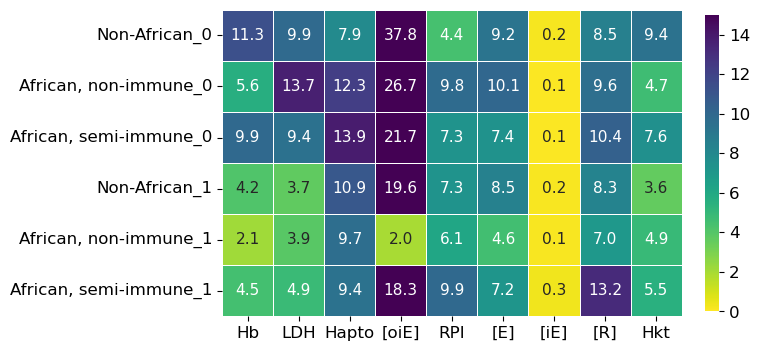

In [62]:
print(feature,pth)
#print(abs(np.array(norm_feature_stats[feature+f'_{pth}']).T[:,:]-np.array(feature_stats[group+f"_{pth}"][feature]).T[:,:]))
matrix = np.zeros(shape=(len(feature_list),6))
x_label=[]
standard_de =-2

for pth in (0,1):
    for j,group in enumerate(groups[:-1]):
        for k,feature in enumerate(feature_list):
            #print(np.correlate(np.array(feature_stats[group+f"_{pth}"][feature]).T[:,:1],np.array(norm_feature_stats[feature+f'_{pth}']).T[:,:1]))
            matrix[k,j+3*pth]=np.nansum(abs(np.array(feature_stats[group+f"_{pth}"][feature]).T[:,:1]-np.array(norm_feature_stats[feature+f'_{pth}']).T[:,:1])/np.array(norm_feature_stats[feature+f'_{pth}']).T[:,standard_de])
        x_label.append(group+f"_{pth}")

fig, ax = plt.subplots(1, 1,figsize=(7.5,7.5), layout='constrained')
#cbar_ax = fig.add_axes([.915, .33, .02, .33])
sns.heatmap(matrix.T, ax=ax, vmin=0, vmax=15, annot=True, fmt=".1f",
            square=True, linewidth=.7,cmap='viridis_r',
            cbar_kws={"shrink": 0.4}, annot_kws={'size':11},
            xticklabels=feature_list,yticklabels=x_label)
plt.xticks(rotation=0)

#fig.tight_layout()
plt.savefig('figures/immunity_v_mean_d_std.pdf', dpi=300,bbox_inches='tight')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Hb'),
  Text(1.5, 0, 'LDH'),
  Text(2.5, 0, 'Hapto'),
  Text(3.5, 0, '[oiE]'),
  Text(4.5, 0, 'RPI'),
  Text(5.5, 0, '[E]'),
  Text(6.5, 0, '[iE]'),
  Text(7.5, 0, '[R]'),
  Text(8.5, 0, 'Hkt')])

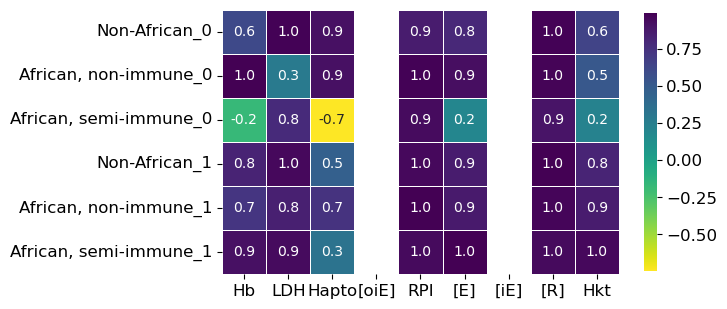

In [28]:
# Pearson correaltion test mean_pth/no_pth vs mean_sub_immunity
matrix = np.zeros(shape=(len(feature_list),6))
for pth in (0,1):
    for j,group in enumerate(groups[:-1]):
        for k,feature in enumerate(feature_list):
            matrix[k,j+3*pth]=np.corrcoef(np.squeeze(np.array(feature_stats[group+f"_{pth}"][feature]).T[:,1]),
                               np.squeeze(np.array(norm_feature_stats[feature+f'_{pth}']).T[:,1]))[0,1]

sns.heatmap(matrix.T, annot=True, fmt=".1f",square=True, linewidth=.7,cmap='viridis_r',
            cbar_kws={"shrink": 0.7},
            xticklabels=feature_list,yticklabels=x_label)
plt.xticks(rotation=0)

0.2500814539285466
0.009473911849900148
0.0005677304786143515
nan
0.9888153866483694
0.23294062659661777
nan
0.9740638350538063
0.306045354367979


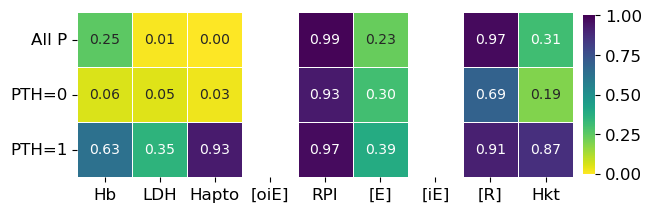

In [29]:
import scipy.stats as stats

matrix = np.zeros(shape=(len(feature_list),6))
all = []
matrix = np.zeros((len(feature_list),3))
for i, feat in enumerate(feature_list):
    j=0
    first = np.squeeze(np.array(feature_stats[groups[0]+f"_{0}"][feat]).T[:,1])
    second = np.squeeze(np.array(feature_stats[groups[1]+f"_{0}"][feat]).T[:,1])
    third = np.squeeze(np.array(feature_stats[groups[2]+f"_{0}"][feat]).T[:,1])
    d_first = np.squeeze(np.array(feature_stats[groups[0]+f"_{1}"][feat]).T[:,1])
    d_second = np.squeeze(np.array(feature_stats[groups[1]+f"_{1}"][feat]).T[:,1])
    d_third = np.squeeze(np.array(feature_stats[groups[2]+f"_{1}"][feat]).T[:,1])
    print(stats.kruskal(first, second, third, d_first, d_second, d_third)[1])
    matrix[i,j]=stats.kruskal(first, second, third, d_first, d_second, d_third)[1]
    for pth in (0,1):
        j+=1
        first = np.squeeze(np.array(feature_stats[groups[0]+f"_{pth}"][feat]).T[:,1])
        second = np.squeeze(np.array(feature_stats[groups[1]+f"_{pth}"][feat]).T[:,1])
        third = np.squeeze(np.array(feature_stats[groups[2]+f"_{pth}"][feat]).T[:,1])
    
        matrix[i,j]=stats.kruskal(first, second, third)[1]

fig, ax = plt.subplots(1, 1)
cbar_ax = fig.add_axes([.915, .33, .02, .33])
sns.heatmap(matrix.T, ax=ax, annot=True, fmt=".2f",square=True, linewidth=.7,cmap='viridis_r',
            cbar_ax=cbar_ax, vmin=0, vmax=1,
            xticklabels=feature_list,yticklabels=['All P','PTH=0','PTH=1'])
plt.savefig('figures/kruskal_pth.pdf', dpi=300,bbox_inches='tight')
#fig.tight_layout()

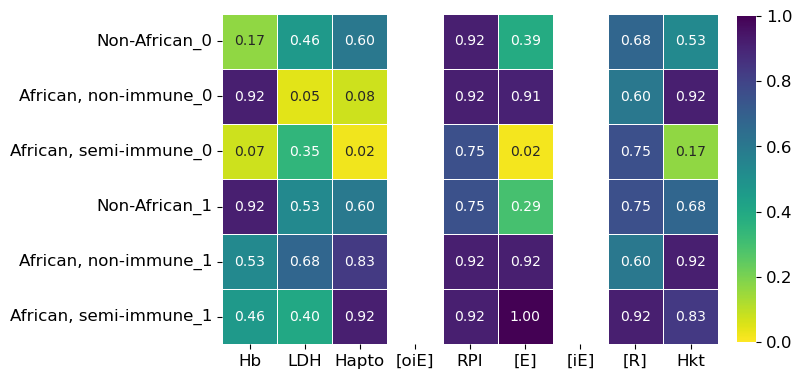

In [30]:
import scipy.stats as stats
matrix = np.zeros(shape=(len(feature_list),6))
all = []
for pth in (0,1):
    for feat in feature_list:
        first = np.squeeze(np.array(feature_stats[groups[0]+f"_{pth}"][feat]).T[:,1])
        second = np.squeeze(np.array(feature_stats[groups[1]+f"_{pth}"][feat]).T[:,1])
        third = np.squeeze(np.array(feature_stats[groups[2]+f"_{pth}"][feat]).T[:,1])
    #norm = np.squeeze(np.array(norm_feature_stats[feature+f'_{pth}']).T[:,1])
    # all.append(first)
    # all.append(second)
    # all.append(third)
        #print(pth,feat,stats.kruskal(first, second, third))
    for j,group in enumerate(groups[:-1]):
        for k,feature in enumerate(feature_list):
            for i in (0,1,2):
                if i==j:continue
                #print(pth,feature,group, groups[i])
                #print(stats.kruskal(np.squeeze(np.array(feature_stats[group+f"_{pth}"][feature]).T[:,2]),
                #                    np.squeeze(np.array(feature_stats[groups[i]+f"_{pth}"][feature]).T[:,2]))[1])
            try:
                matrix[k,j+3*pth]=stats.kruskal(np.squeeze(np.array(feature_stats[group+f"_{pth}"][feature]).T[:,1]),
                                                np.squeeze(np.array(norm_feature_stats[feature+f'_{pth}']).T[:,1]),
                                                )[1]
            except:
                matrix[k,j+3*pth]= np.nan

fig, ax = plt.subplots(1, 1)
cbar_ax = fig.add_axes([.93, .155, .03, .68])
#ticks = np.linspace(0,1,5)
a = sns.heatmap(matrix.T, ax=ax, annot=True, fmt=".2f",square=True, linewidth=.7,cmap='viridis_r',
            cbar_ax=cbar_ax, vmin=0,
            xticklabels=feature_list,yticklabels=x_label)

#print(a.collections[0].colorbar.set_ticklabels([str(x) for x in ticks]))

plt.xticks(rotation=0)
plt.savefig('figures/krukal_immune.pdf', dpi=300,bbox_inches='tight')

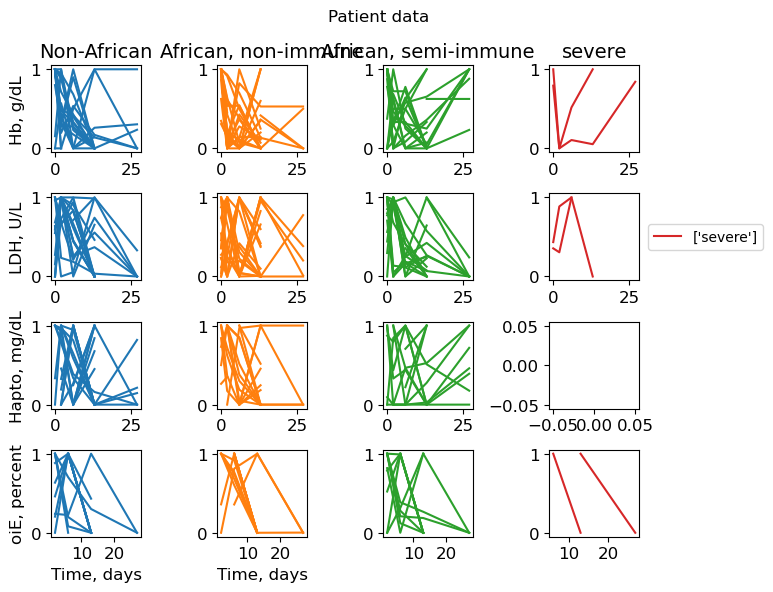

In [31]:
fig, ax = plt.subplots(4, 4, figsize=(8, 6))
for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])
    c_int = np.where(groups==patient_df["Groups"].unique())[0][0]
    
    color = [f'C{i}' for i in range(len(groups))][c_int]
    ax[0, c_int].plot(patient_df['time'], patient_df['Hb_minmax_ind'], label=patient_df["Groups"].unique(), color=color)
    ax[1, c_int].plot(patient_df['time'], patient_df['LDH_minmax_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[2, c_int].plot(patient_df['time'], patient_df['Hapto_minmax_ind'], label = patient_df["Groups"].unique(), color=color)
    ax[3, c_int].plot(patient_df['time'], patient_df['oiE_percent_minmax_ind'], label = patient_df["Groups"].unique(), color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    
for i, group in enumerate(groups):
    ax[0, i].set_title(f'{group}')

legend_without_duplicate_labels(ax[1, -1])

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()